# PHAN BA DUC - PROJECT + PRESENTATION

Hello everybody. Because we only have 10 minutes so I decide to combine both my presentation and colab so we can easy to follow

We only have 10 minutes so Let's start:
* Don't hesitate to ask questions, it's a good practice.


__*I have several parts for this project. First we will look at the data, analysis and preprocess it and then, we will work with some models*__

## Part 1. Understanding data and make some small change.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+),  Estimation of obesity levels based on eating habits and physical condition

In [230]:

! wget https://raw.githubusercontent.com/HeoKiu/ML_HW/main/ObesityDataSet_raw_and_data_sinthetic.csv

--2022-12-23 11:04:02--  https://raw.githubusercontent.com/HeoKiu/ML_HW/main/ObesityDataSet_raw_and_data_sinthetic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263646 (257K) [text/plain]
Saving to: ‘ObesityDataSet_raw_and_data_sinthetic.csv.5’

ObesityDataSet_raw_ 100%[===================>] 257.47K  --.-KB/s    in 0.03s   

2022-12-23 11:04:02 (7.88 MB/s) - ‘ObesityDataSet_raw_and_data_sinthetic.csv.5’ saved [263646/263646]



In [231]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [232]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [233]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [234]:
df.shape

(2111, 17)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [236]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [237]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [238]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [239]:
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [240]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))


Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


## Part 2. Analysis the data.

> Indented block



In [241]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))


Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


In [242]:
df1 = df.copy()

In [244]:
mapping0 = {1:'Never', 2:'Sometimes', 3:'Always'}
mapping1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}
mapping5 = {0:'Female', 1:'Male'}

In [243]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)
df['Gender'] = df['Gender'].replace(mapping5)

In [245]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,Always,3,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,Always,3,Sometimes,no,2.00513,no,1.34139,0.59927,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,Always,3,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,Always,3,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [246]:
c = Counter(df['Obesity'])
print(c)

Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


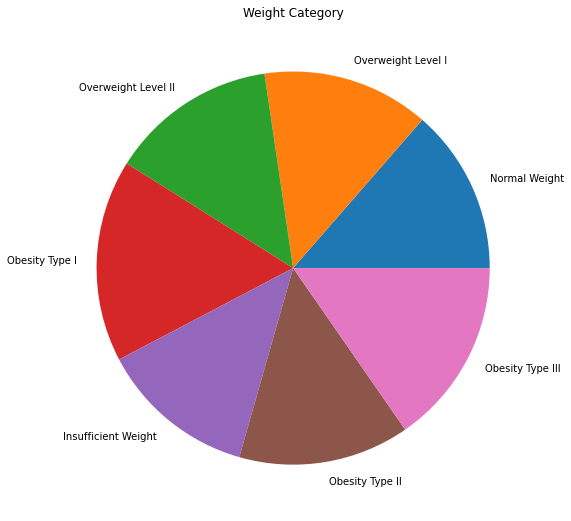

In [247]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category') 
plt.tight_layout()




## Part 3. Preprocessing .

In [248]:
df1.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II


Since classifier cannot operate with label data directly, One Hot Encoder and Label Encoding will be used to assign numeric values to each category

In [249]:
cat = df1.dtypes == object

print(cat)

# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                                        True
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food     True
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
dtype: bool
Gender                                       True
Family History with Overweight               True
Frequent consumption 

In [250]:
df1.head(3)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight


In [251]:
df1.columns

def col_no(x):
    d = {}
    d[df1.columns[x]] = x
    return(d)

print([col_no(x) for x in range(0, len(df1.columns))])

[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Consumption of water daily': 10}, {'Calories consumption monitoring': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Consumption of alcohol': 14}, {'Transportation used': 15}, {'Obesity': 16}]


In [252]:
x = df1[df1.columns[:-1]]
y = df['Obesity']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [253]:
y_test

1480         Obesity Type I
1058    Overweight Level II
1398         Obesity Type I
288           Normal Weight
61            Normal Weight
               ...         
670     Insufficient Weight
1214         Obesity Type I
753      Overweight Level I
1755        Obesity Type II
338      Overweight Level I
Name: Obesity, Length: 423, dtype: object

The target value, obesity level, will be transformed into digit label with LabelEncoder.

StandardScaler is applied to attributes with values which ranges are not consistent with the rest, to avoid disproportionate weight assigned to these values. (i.e. Age, Height, Weight).

Features that are ordinal in nature (i.e. answers including 'never', 'sometimes', 'always') will be preprocessed with OrdinalEncoder (exactly the same function is LabelEncoder, however this will take in multiple arguments as the latter is meant for the y-value only).

Features that are non-ordinal in nature will be preprocessed with OneHotEncoder, so that the generated labels will not be interpreted in a way that suggests one answer is more important than the other (e.g. 3 is more important than 1).

SimpleImputer is applied to all attributes to deal with missing values.

All of these preprocessing techniques will be bundled into a pipeline, which will be deployed with classifiers later

In [254]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([3, 6, 3, ..., 3, 6, 0])

In [255]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_train = le.fit_transform(y_test)
y_test_train

array([2, 6, 2, 1, 1, 4, 2, 6, 0, 0, 1, 0, 2, 6, 5, 4, 6, 4, 2, 6, 1, 6,
       0, 4, 2, 6, 0, 6, 0, 1, 2, 1, 1, 1, 4, 1, 1, 3, 2, 2, 3, 3, 3, 3,
       3, 4, 2, 5, 0, 6, 6, 5, 2, 4, 2, 1, 2, 2, 2, 5, 4, 0, 3, 2, 0, 1,
       2, 5, 2, 6, 1, 4, 2, 1, 1, 5, 3, 1, 6, 0, 3, 1, 0, 1, 4, 5, 4, 2,
       2, 6, 4, 2, 6, 5, 4, 5, 3, 2, 0, 4, 5, 5, 5, 0, 5, 0, 4, 4, 0, 4,
       1, 2, 1, 5, 3, 6, 4, 0, 2, 0, 6, 0, 0, 5, 4, 1, 3, 5, 5, 5, 3, 3,
       3, 1, 0, 1, 4, 5, 1, 4, 0, 1, 4, 0, 2, 3, 5, 3, 6, 2, 2, 2, 0, 3,
       3, 5, 5, 3, 0, 1, 3, 0, 3, 0, 2, 4, 1, 5, 3, 3, 0, 2, 6, 5, 5, 5,
       0, 0, 3, 5, 4, 4, 0, 6, 4, 4, 6, 1, 5, 4, 5, 1, 4, 6, 2, 2, 0, 1,
       1, 2, 2, 3, 5, 0, 3, 1, 3, 4, 6, 6, 0, 0, 2, 2, 3, 5, 2, 4, 6, 3,
       2, 1, 0, 2, 1, 0, 6, 5, 4, 6, 5, 3, 6, 1, 5, 0, 3, 4, 5, 5, 2, 3,
       5, 5, 2, 1, 2, 2, 3, 4, 2, 2, 0, 0, 5, 6, 3, 1, 2, 2, 0, 2, 1, 1,
       0, 2, 4, 5, 5, 0, 1, 1, 1, 2, 2, 4, 4, 2, 2, 0, 4, 3, 3, 3, 2, 3,
       3, 5, 1, 5, 3, 3, 2, 5, 2, 2, 4, 4, 5, 6, 6,

In [256]:
Scale_features = ['Age', 'Height', 'Weight']
Scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaling', StandardScaler())
])

Ordi_features = ['Consumption of food between meals', 'Consumption of alcohol']
Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])

NonO_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Smoke', 'Calories consumption monitoring', 'Transportation used']
NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder())
])

Preprocessor = ColumnTransformer(transformers=[
    ('Scale', Scale_transformer, Scale_features),
    ('Ordinal', Ordi_transformer, Ordi_features),
    ('Non-Ordinal', NonO_transformer, NonO_features)
], remainder = 'passthrough')
    
clf = Pipeline(steps=[('preprocessor', Preprocessor)])

In [257]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
 

In [258]:
trans_df = clf.fit_transform(x_train)
print(trans_df.shape)
trans_x_test = clf.fit_transform(x_test)


(1688, 25)


In [259]:
trans_x_test = clf.fit_transform(x_test)


In [260]:
trans_x_test.shape

(423, 25)

In [261]:
## Column name of first two steps in pipeline

cols = [y for x in [Scale_features, Ordi_features] for y in x]
cols

['Age',
 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol']

In [262]:
# Column names of OneHotEncoder step in pipeline

ohe_cols = clf.named_steps['preprocessor'].transformers_[2][1]\
    .named_steps['Non-O'].get_feature_names(NonO_features)
ohe_cols = [x for x in ohe_cols]
ohe_cols

['Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking']

In [263]:
non_cat

Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')

In [264]:
transformed_x_train = pd.DataFrame(trans_df, columns= ['Age', 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol','Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking', 'Frequency of consumption of vegetables',
 'Number of main meals',
 'Consumption of water daily',
 'Physical activity frequency',
 'Time using technology devices'])

In [265]:

transformed_x_train

,Age,Height,Weight,Consumption of food between meals,Consumption of alcohol,Gender_Female,Gender_Male,Family History with Overweight_no,Family History with Overweight_yes,Frequent consumption of high caloric food_no,...,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
0,2.051864,0.555862,1.190568,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.535154,2.915921,1.892400,0.693732,0.067410
1,-0.218916,0.180037,-0.198272,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.000000,1.729553,1.400247,0.887923,1.011983
2,-0.047830,1.328988,1.305665,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.403421,3.000000,2.490613,2.000000,0.707768
3,3.202807,-0.281691,-0.275004,2.0,2.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.598051,3.000000,1.000000,0.000000,0.000000
4,-0.483322,0.502173,1.796747,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.000000,3.000000,2.247979,1.609938,0.849236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,0.247682,-0.646778,0.956537,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.000000,3.000000,2.552388,0.000000,0.196288
1684,0.092150,0.931687,1.186731,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.191108,2.993856,2.444917,1.055854,0.145284
1685,0.092150,0.920949,1.094654,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.735664,3.000000,2.041536,1.392406,0.391740
1686,-0.281129,-0.560875,-0.263494,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.000000,3.000000,2.000000,0.451078,2.000000


In [266]:
y_train

array([3, 6, 3, ..., 3, 6, 0])

In [267]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)

{0: 'Insufficient Weight', 1: 'Normal Weight', 2: 'Obesity Type I', 3: 'Obesity Type II', 4: 'Obesity Type III', 5: 'Overweight Level I', 6: 'Overweight Level II'}


### Part 4. Let's work with some models


**Let's try to find optimal hyperparameter for Logistic Regression**

In [268]:
from sklearn.linear_model import LogisticRegression
! pip install scikit-plot
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from scikitplot.metrics import plot_roc
logreg = LogisticRegression()


estimator = LogisticRegression(solver='saga', multi_class='multinomial', max_iter= 500, tol=1e-3, random_state=42)
estimator.get_params().keys()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [277]:
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
param_grid = {'C': [0.1, 1, 2, 5, 10, 15, 20, 50, 100], 'penalty': ['l1', 'l2']}
cv = 4
grid = GridSearchCV(estimator, param_grid, cv=cv)
#optimizer.fit(X_train_scaled, y_train)
grid.fit(transformed_x_train, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.1, 1, 2, 5, 10, 15, 20, 50, 100],
                         'penalty': ['l1', 'l2']})

In [319]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()

optimal_logreg = LogisticRegression(penalty=grid.best_params_['penalty'], 
                                              C=grid.best_params_['C'], solver='saga', 
                                              multi_class='multinomial', max_iter= 1000, 
                                              tol=1e-3, random_state=42)
# optimal_logreg.fit(transformed_x_train, y_train)
# logreg.fit(trans_x_test, y_test)

# optimal_logreg_def = LogisticRegression(max_iter = 500);



# cv_optimal_logreg = cross_val_score(optimal_logreg,transformed_x_train,y_train,cv=10)
# cv_optimal_logreg_2=cross_val_score(optimal_logreg_def,transformed_x_train,y_train,cv=10)
optimal_logreg.fit(transformed_x_train,y_train)

y_pred = optimal_logreg.predict(trans_x_test)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))


Accuracy: 0.8534278959810875, f1 score: 0.8423787038447316


Let's try with PCA, is there anything we can do ?

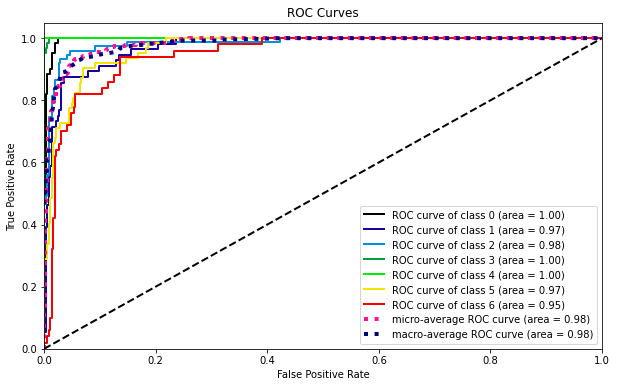

In [322]:
logreg.fit(transformed_x_train, y_train)
y_pred = logreg.predict_proba(trans_x_test)
plot_roc(y_test, y_pred, figsize = (10, 6))

In [342]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.75      0.91      0.82        56
           2       0.91      0.95      0.93        75
           3       0.97      0.97      0.97        62
           4       1.00      1.00      1.00        57
           5       0.93      0.81      0.86        62
           6       0.84      0.82      0.83        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



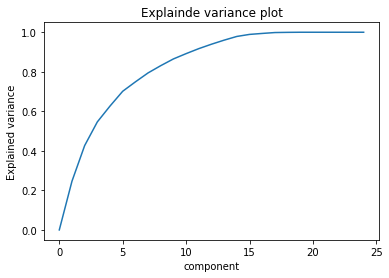

In [311]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
X_train_pca = pca.fit(transformed_x_train)
exp_var_pca = pca.explained_variance_ratio_
plt.plot([np.sum(exp_var_pca[:i]) for i in range(len(exp_var_pca))])
plt.title('Explainde variance plot')
plt.xlabel('component')
plt.ylabel('Explained variance')

plt.show()

**Decision Tree**

{'max_depth': 14}


Text(0, 0.5, 'Score')

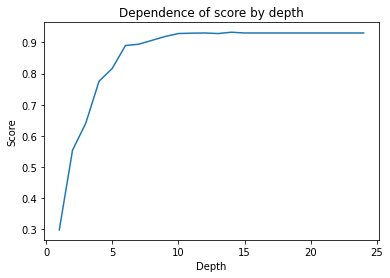

In [312]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(1, 25)}
estimator = DecisionTreeClassifier(random_state=42)
log_regressor = GridSearchCV(estimator, param_grid, cv=4)
log_regressor.fit(transformed_x_train, y_train)
print(log_regressor.best_params_)
log_regressor.fit(transformed_x_train, y_train)
plt.plot(np.arange(1, 25), log_regressor.cv_results_['mean_test_score'])
plt.title('Dependence of score by depth')
plt.xlabel("Depth")
plt.ylabel('Score')

In [313]:
optimal_dectree_estimator = DecisionTreeClassifier(max_depth=log_regressor.best_params_['max_depth'], random_state=42)

optimal_dectree_estimator.fit(transformed_x_train, y_train)

y_pred = optimal_dectree_estimator.predict(trans_x_test)
# micro - accuracy, macro - mean by each label
print('Accuracy: {}, f1 score: {}'.format(accuracy_score(y_pred, y_test), f1_score(y_pred, y_test, average='macro')))

Accuracy: 0.8439716312056738, f1 score: 0.8413746949093097


In [314]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.70      0.82        61
           1       0.62      0.71      0.66        56
           2       0.88      0.93      0.90        75
           3       0.92      0.95      0.94        62
           4       1.00      1.00      1.00        57
           5       0.77      0.71      0.74        62
           6       0.79      0.88      0.83        50

    accuracy                           0.84       423
   macro avg       0.85      0.84      0.84       423
weighted avg       0.85      0.84      0.84       423



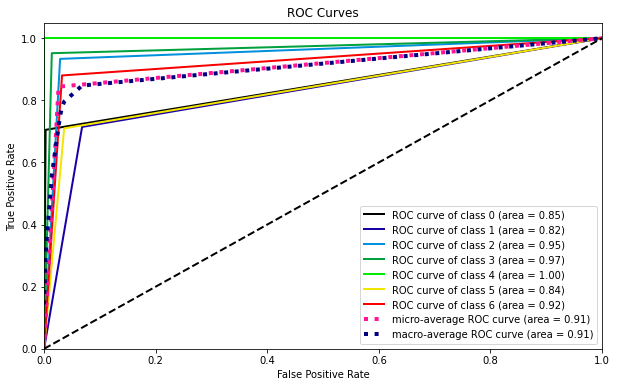

In [315]:
y_pred = optimal_dectree_estimator.predict_proba(trans_x_test)
plot_roc(y_test, y_pred, figsize = (10, 6))

**Random Forest**

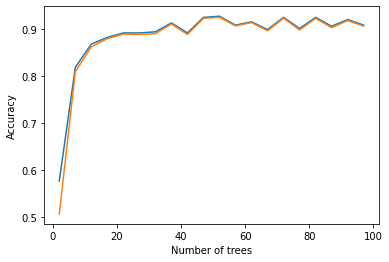

In [335]:
from sklearn.ensemble import RandomForestClassifier

num_of_trees = list(range(2, 100, 5))
accuracy_rf = []
f1_rf = []

for n_estimators in num_of_trees:
    random_forest_clf = RandomForestClassifier(n_estimators=n_estimators)
    random_forest_clf.fit(transformed_x_train, y_train)
    
    acc = random_forest_clf.score(trans_x_test, y_test)
    accuracy_rf.append(acc)
    
    y_pred = random_forest_clf.predict(trans_x_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1_rf.append(f1_sc)

plt.plot(list(range(2, 100, 5)), accuracy_rf, label = 'accuracy')
plt.plot(list(range(2, 100, 5)), f1_rf, label = 'f1')


plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

**Let's try with some default classifier**

In [340]:
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,transformed_x_train,y_train,cv=4)
print(cv_knn)
print(cv_knn.mean())

[0.82464455 0.83649289 0.83886256 0.82701422]
0.8317535545023697


In [341]:
svc = SVC(probability = True)
cv_svc = cross_val_score(svc,transformed_x_train,y_train,cv=4)
print(cv_svc)
print(cv_svc.mean())

[0.9028436  0.87914692 0.88625592 0.87203791]
0.8850710900473935


## Conclusion .

The model give us the best solution is Logistic Regression with optimal hyperparameter, also we don't see big difference between Random Forest and Decision Tree. Knn and SVC also give us good results.